In [1]:
import pandas as pd
import seaborn as sns

In [4]:
#Importando dataset
df = pd.read_excel('Notas.xlsx')

In [ ]:
df.head()

# 1) Qual a quantidade de linhas e colunas desse dataframe?

In [9]:
shape = list(df.shape)
print(f"Há {shape[0]} linhas e {shape[1]} colunas!")

Há 1000 linhas e 8 colunas!


# 2) Quais os tipos das váriaveis desse dataframe?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   genero                 1000 non-null   object
 1   etnia                  1000 non-null   object
 2   escolaridade dos pais  1000 non-null   object
 3   almoco                 1000 non-null   object
 4   simulado               1000 non-null   object
 5   nota matematica        1000 non-null   int64 
 6   nota literatura        1000 non-null   int64 
 7   nota redacao           1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3) Há valores nulos nesse dataframe?

In [16]:
df.isna().sum()

genero                   0
etnia                    0
escolaridade dos pais    0
almoco                   0
simulado                 0
nota matematica          0
nota literatura          0
nota redacao             0
dtype: int64

# 4) Crie um novo dataframe chamado "df1", esse dataframe deve possuir somente as colunas "genero" e "almoco"

In [18]:
df1 = df[['genero','almoco']]
df1.head()

,genero,almoco
0,female,standard
1,female,standard
2,female,standard
3,male,free/reduced
4,male,standard


# 5) Ordene o dataset de forma crescente de acordo com a nota de redação

In [20]:
df = df.sort_values('nota redacao',ascending = True)
df

,genero,etnia,escolaridade dos pais,almoco,simulado,nota matematica,nota literatura,nota redacao
59,female,group C,some high school,free/reduced,none,0,17,10
596,male,group B,high school,free/reduced,none,30,24,15
327,male,group A,some college,free/reduced,none,28,23,19
76,male,group E,some high school,standard,none,30,26,22
980,female,group B,high school,free/reduced,none,8,24,23
...,...,...,...,...,...,...,...,...
970,female,group D,bachelor's degree,standard,none,89,100,100
106,female,group D,master's degree,standard,none,87,100,100
957,female,group D,master's degree,standard,none,92,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100


# 6) Qual é a maior nota em matemática?

In [21]:
df['nota matematica'].max()

100

# 7) Qual é a menor nota em literatura?

In [22]:
df['nota literatura'].min()

17

# 8) Qual é a soma de todas as notas em redacao?

In [23]:
df['nota literatura'].sum()

69169

# 9) Qual é a nota em matemática do aluno de index 502?

In [26]:
df['nota matematica'][502]

63

# 10) Quantos grupos étnicos existem no dataframe?

In [30]:
print(df['etnia'].unique())
print(f"há {len(df['etnia'].unique())} grupos étnicos")

['group C' 'group B' 'group A' 'group E' 'group D']
há 5 grupos étnicos


# 11) Dentro da coluna etnia, qual é o grupo que possui a maior quantidade de pessoas?

In [54]:
df['etnia'].value_counts().idxmax()



'group C'

# 12) Qual é o index da aluna que tirou a menor nota em literatura?

In [67]:
idxAluna = df['nota literatura'].idxmin()
df[df.index == idxAluna]
#idxAluna

,genero,etnia,escolaridade dos pais,almoco,simulado,nota matematica,nota literatura,nota redacao
59,female,group C,some high school,free/reduced,none,0,17,10


# 13) Qual é a escolaridade mais comum entre os pais dos alunos?

In [80]:
dfEscolaridade = df['escolaridade dos pais'].value_counts()
dfEscolaridade.idxmax()

'some college'

# 14) Printe a correlação entre as variáveise identifique  a variável que tem a maior correlação positiva com as notas em redação

In [5]:
#não sabia fazer
df_corr = df.corr(method = 'pearson')
df_corr

<ipython-input-5-1fe62b99ca34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method = 'pearson')


,nota matematica,nota literatura,nota redacao
nota matematica,1.000000,0.817580,0.802642
nota literatura,0.817580,1.000000,0.954598
nota redacao,0.802642,0.954598,1.000000


# 15) Realize um groupby e agrupe a coluna "escolaridade dos pais". Após agrupado, verifique qual é a maior nota média em matemática dentre os grupos.

In [18]:
dfescolaridade2 = df.groupby('escolaridade dos pais').mean().sort_values('nota matematica',ascending = False)
dfescolaridade2['nota matematica'].max()

<ipython-input-18-65c95615dae8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfescolaridade2 = df.groupby('escolaridade dos pais').mean().sort_values('nota matematica',ascending = False)


69.7457627118644

# 16) Plote um gráfico de barras que compara a média da nota em literatura de pessoas que tem almoço standard com as que tem almoço free/reduced

<Axes: xlabel='almoco'>

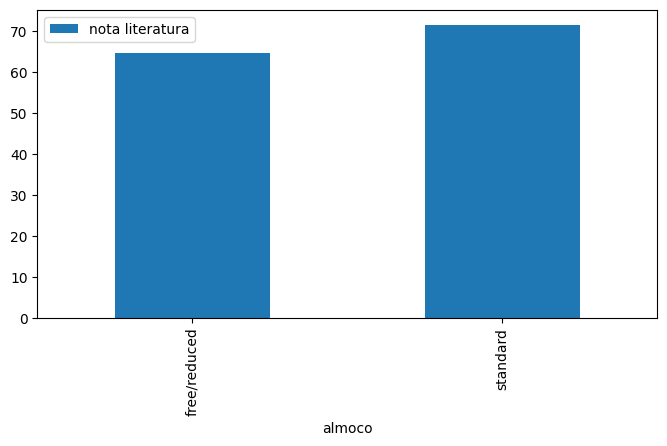

In [20]:
df.groupby('almoco')[['nota literatura']].mean().plot(kind = 'bar',figsize=(8,4))

# 17) Crie uma nova coluna chamada "media geral", ela deve ser uma média das notas de matemática, literatura e redação.

In [43]:
df['media geral'] = round((df['nota literatura'] + df['nota matematica'] + df['nota redacao']) / 3,2)
df

,genero,etnia,escolaridade dos pais,almoco,simulado,nota matematica,nota literatura,nota redacao,media geral
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


# 18) Plote um histograma com as notas da media geral

<Axes: ylabel='Frequency'>

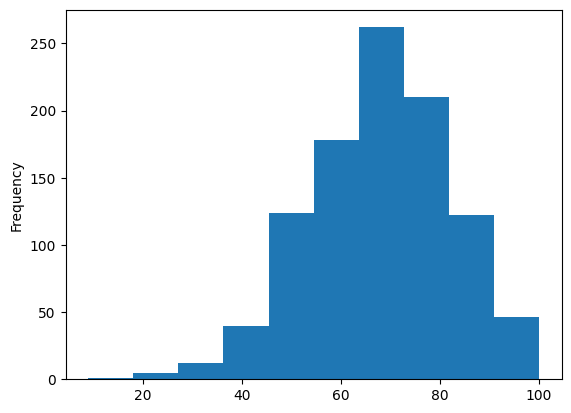

In [24]:
df['media geral'].plot(kind = 'hist')

# 19) Verifique qual é a média geral de pessoas que completaram o simulado e compare com a média geral de pessoas que não completaram o simulado.

In [29]:
df.groupby('simulado')[['media geral']].mean()


           media geral
simulado              
completed    72.669469
none         65.038801


# 20) O diretor da escola decidiu dar 10 pontos na média geral para pessoas que completaram o simulado. Crie um código que faça essa operação de forma que nenhuma pessoa exceda os 100 pontos.

In [44]:

for i in df.index:
  if df['simulado'][i] == 'completed':
    if df['media geral'][i] > 91:
      df['media geral'][i] = 100
    else:
       df['media geral'][i] += 10



<ipython-input-44-cf9b83bdcf64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['media geral'][i] += 10
<ipython-input-44-cf9b83bdcf64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['media geral'][i] = 100


In [45]:
df.head()

,genero,etnia,escolaridade dos pais,almoco,simulado,nota matematica,nota literatura,nota redacao,media geral
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,92.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
